# Librairie `numpy`

<div class="alert alert-block alert-danger">
    Si vous utilisez ce notebook via mybinder, pensez à télécharger votre fichier à la fin de la séance afin de conserver une trace de votre travail !
</div>

## Création/manipulation de tableaux

- Créer un vecteur contenant les nombres entiers de 0 à 9 puis n'afficher que les valeurs paires de ce vecteur. Remplacer ensuite ces valeurs paires par -1.

In [1]:
import numpy as np

v = np.arange(0, 10)
v[v % 2 == 1] = -1
v

array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1])

- Créer un vecteur de 20 valeurs flottantes réparties uniformément entre 1 et 50. À l'aide de la fonction `where` de `numpy`, remplacer les valeurs inférieures à 10 par 10 et celle supérieure à 30 par 30.

In [2]:
v = np.random.uniform(1, 50, 20)
v = np.where(v < 10, 10, np.where(v > 30, 30, v))
v

array([30.        , 16.40321343, 10.        , 30.        , 10.        ,
       22.48997039, 17.18637043, 10.        , 10.28640007, 30.        ,
       30.        , 10.        , 24.36892692, 29.15274711, 17.69292567,
       27.53314392, 30.        , 21.096698  , 23.63875868, 15.50700019])

- Créer les matrices suivantes en respectant le type et en 3 opérations maximum

    \begin{align*}
      \begin{bmatrix}
        1&1&1&1\\
        1&1&1&1\\
        1&1&1&2\\
        1&6&1&1\\
      \end{bmatrix}&\qquad
      \begin{bmatrix}
        0.& 0.& 0.& 0.& 0.\\
        2.& 0.& 0.& 0.& 0.\\
        0.& 3.& 0.& 0.& 0.\\
        0.& 0.& 4.& 0.& 0.\\
        0.& 0.& 0.& 5.& 0.\\
        0.& 0.& 0.& 0.& 6.\\
      \end{bmatrix}
    \end{align*}

    Dans le second cas, on pourra s'aider de la méthode `diag`

In [3]:
M = np.ones((4, 4))
M[2, 3] = 2
M[3, 1] = 6
M

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 2.],
       [1., 6., 1., 1.]])

In [4]:
M = np.diag([2, 3, 4, 5, 6], k=-1)
M = M[:, :5]
M

array([[0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [0, 3, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 6]])

- En utilisant la méthode `tile`, reproduire la matrice suivante à l'aide d'une seule commande

$$
    \begin{bmatrix}
        4& 3& 4& 3& 4& 3\\
        2& 1& 2& 1& 2& 1\\
        4& 3& 4& 3& 4& 3\\
        2& 1& 2& 1& 2& 1\\
    \end{bmatrix}
$$

In [5]:
M = np.tile([[4,3], [2, 1]], (2, 3))
M

array([[4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1],
       [4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1]])

---

## Sale temps sur Seattle

- Télécharger le fichier [`seattle2014.csv`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/seattle2014.csv) qui contient pour chaque jour de l'année 2014 (colonne 1), la hauteur des précipitations exprimé en dixième de millimètres (colonne 2) ainsi que les températures maximale (colonne 3) et minimale (colonne 4), exprimées en dixième de degrés Celsius, à Seattle.

In [6]:
data = np.loadtxt(
    "data/seattle2014.csv",
    delimiter=",",
)

day = data[:, 0]
prcp = data[:, 1] / 100  # cm
Tmax = data[:, 2] / 10  # °C
Tmin = data[:, 3] / 10  # °C

- Charger l'ensemble des données dans un tableau `numpy` en prenant bien garde au caractère délimitant chaque champ puis, après avoir converti la hauteur des précipitations en centimètres et les températures en degré Celsius, calculer les valeurs suivantes sur chacune des données du fichier (hauteur des précipitations, $T_\text{min}$ et $T_\text{max}$) :

  1. moyenne, médiane et écart type
  2. valeurs minimale et maximale
  3. les quantiles à 25% et 75%

In [7]:
def print_report(prcp, Tmin, Tmax):
    print("Hauteur des précipitations:")
    print("  valeur moyenne = {:.2f} cm".format(np.mean(prcp)))
    print("  valeur médiane = {:.2f} cm".format(np.median(prcp)))
    print("      écart type = {:.2f} cm".format(np.std(prcp)))
    print("     valeur min. = {:.2f} cm".format(np.min(prcp)))
    print("     valeur max. = {:.2f} cm".format(np.max(prcp)))
    print("  quantile à 25% = {:.2f} cm".format(np.percentile(prcp, 25)))
    print("  quantile à 75% = {:.2f} cm".format(np.percentile(prcp, 75)))
    print("\n")

    print("Température minimale:")
    print("  valeur moyenne = {:.2f} °C".format(np.mean(Tmin)))
    print("  valeur médiane = {:.2f} °C".format(np.median(Tmin)))
    print("      écart type = {:.2f} °C".format(np.std(Tmin)))
    print("     valeur min. = {:.2f} °C".format(np.min(Tmin)))
    print("     valeur max. = {:.2f} °C".format(np.max(Tmin)))
    print("  quantile à 25% = {:.2f} °C".format(np.percentile(Tmin, 25)))
    print("  quantile à 75% = {:.2f} °C".format(np.percentile(Tmin, 75)))
    print("\n")

    print("Température maximale:")
    print("  valeur moyenne = {:.2f} °C".format(np.mean(Tmax)))
    print("  valeur médiane = {:.2f} °C".format(np.median(Tmax)))
    print("      écart type = {:.2f} °C".format(np.std(Tmax)))
    print("     valeur min. = {:.2f} °C".format(np.min(Tmax)))
    print("     valeur max. = {:.2f} °C".format(np.max(Tmax)))
    print("  quantile à 25% = {:.2f} °C".format(np.percentile(Tmax, 25)))
    print("  quantile à 75% = {:.2f} °C".format(np.percentile(Tmax, 75)))
    print("\n")


print("- Valeurs annuelles")
print_report(prcp, Tmin, Tmax)

- Valeurs annuelles
Hauteur des précipitations:
  valeur moyenne = 0.34 cm
  valeur médiane = 0.00 cm
      écart type = 0.68 cm
     valeur min. = 0.00 cm
     valeur max. = 4.67 cm
  quantile à 25% = 0.00 cm
  quantile à 75% = 0.36 cm


Température minimale:
  valeur moyenne = 8.66 °C
  valeur médiane = 9.40 °C
      écart type = 4.97 °C
     valeur min. = -6.00 °C
     valeur max. = 17.80 °C
  quantile à 25% = 5.60 °C
  quantile à 75% = 12.80 °C


Température maximale:
  valeur moyenne = 17.00 °C
  valeur médiane = 16.10 °C
      écart type = 7.26 °C
     valeur min. = -1.60 °C
     valeur max. = 35.60 °C
  quantile à 25% = 11.10 °C
  quantile à 75% = 22.20 °C




- Afficher les valeurs ci-dessus pour la période estivale

In [8]:
print("- Valeurs estivales")
summer = (day > 20140401) & (day < 20140930)
print_report(prcp[summer], Tmin[summer], Tmax[summer])

- Valeurs estivales
Hauteur des précipitations:
  valeur moyenne = 0.18 cm
  valeur médiane = 0.00 cm
      écart type = 0.48 cm
     valeur min. = 0.00 cm
     valeur max. = 3.33 cm
  quantile à 25% = 0.00 cm
  quantile à 75% = 0.03 cm


Température minimale:
  valeur moyenne = 11.92 °C
  valeur médiane = 12.80 °C
      écart type = 3.13 °C
     valeur min. = 4.40 °C
     valeur max. = 17.80 °C
  quantile à 25% = 10.00 °C
  quantile à 75% = 14.40 °C


Température maximale:
  valeur moyenne = 22.32 °C
  valeur médiane = 22.20 °C
      écart type = 5.43 °C
     valeur min. = 11.10 °C
     valeur max. = 35.60 °C
  quantile à 25% = 18.90 °C
  quantile à 75% = 26.10 °C




- Calculer la hauteur totale d'eau tombée à Seattle en 2014

In [9]:
print("Hauteur totale d'eau en 2014 : {} cm".format(np.sum(prcp)))

Hauteur totale d'eau en 2014 : 123.28 cm


- Dénombrer le nombre total de jours dans l'année pendant lesquels il a plu à Seattle et déterminer combien de ces jours étaient pairs

In [10]:
print("Nombre de jours pairs avec pluie : {}".format(np.sum((prcp > 0) & (day % 2 == 0))))

Nombre de jours pairs avec pluie : 71


---

## Manipulation d'images

Une image n'est rien d'autre qu'une matrice où chaque pixel contient une information colorimétrique. La notion de tableau *à la* `numpy` est donc parfaitement adaptée à la représentation de ces objets.

En fonction du système colorimétrique choisi, chaque pixel peut être :
- un nombre entier compris entre 0 et 255 ou un nombre flottant compris entre 0.0 et 1.0 quantifiant  le niveau de gris du pixel,
- un triplet de valeurs $(R, V, B)$ soit entières (entre 0 et 255) soit flottantes (entre 0.0 et 1.0) donnant respectivement le niveau de rouge, vert et bleu du pixel,
- un triplet de valeurs ($\ell, \alpha, \beta$) correspondant à la luminosité $\ell$, l'opposition bleu-jaune $\alpha$ et l'opposition vert-rouge $\beta$,
- ...

Les opérations mathématiques sur des tableaux `numpy` permettent ainsi de changer d'espaces colorimétriques en minimisant le nombre d'opérations. De même, la sélection par masque permet d'appliquer des transformations à des sous-espaces de l'image.

Dans la suite de l'exercice, on s'aidera des fonctions intégrées à la librairie `matplotlib` pour lire et pour représenter une image au format `png` ou `jpeg`. On utilisera en particulier les fonctions `imread` et `imshow` pour lire puis afficher l'image `matplotlib` comme suit
```python
  import matplotlib.pyplot as plt
  img = plt.imread("mon_image.png")
  plt.imshow(img)
```

### Changement d'espace colorimétrique

1. Créer une image de 500x500 pixels contenant du bruit blanc *i.e.* des valeurs aléatoirement réparties entre 0.0 et 1.0. Afficher l'image en utilisant l'échelle de couleur `cmap="gray"` (à passer en argument de la fonction `imshow`).

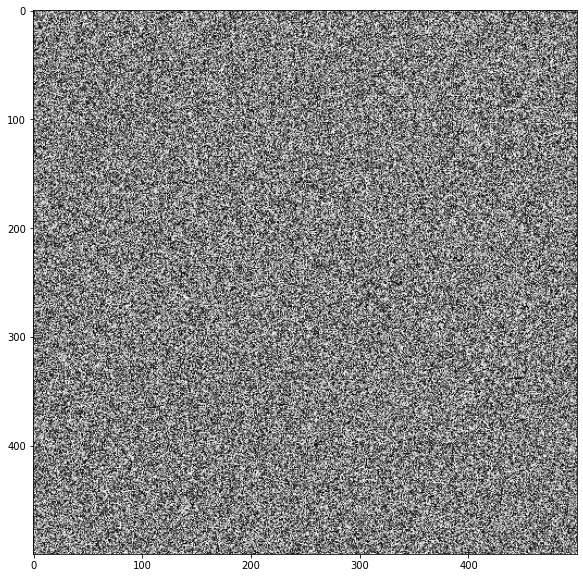

In [11]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)

img = np.random.rand(500, 500)
plt.imshow(img, cmap="gray");

2. Charger l'image [`balloon.png`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/balloon.png) puis afficher la. Quelle est la taille de l'image ? Dans quel espace colorimétrique est-elle représentée ?

Taille de l'image 300x225 pixels
Système colorimétrique (R, V, B)


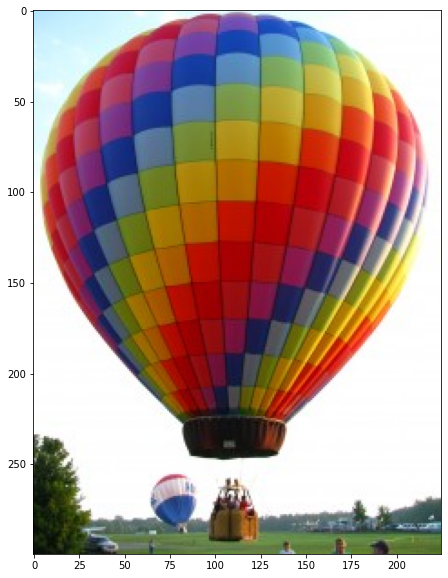

In [12]:
img = plt.imread(
    "https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/balloon.png"
)
plt.imshow(img)

print("Taille de l'image {}x{} pixels".format(*img.shape[:2]))

if len(img.shape) == 3:
    print("Système colorimétrique (R, V, B)")

3. La calcul de la luminance `Y` d'un pixel (également appelé niveau de gris) se fait, à partir du système colorimétrique $(R, V, B)$, par la transformation 

    $$Y = 0.2126\times R+0.7152\times V+0.0722\times B$$
    
    Convertir l'image initiale en niveau de gris et l'afficher.

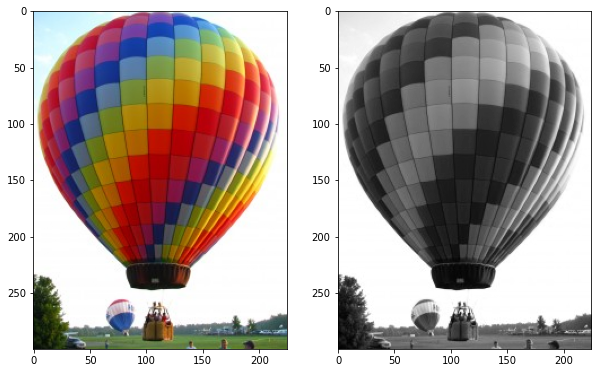

In [13]:
img1 = np.dot(img, [0.2126, 0.7152, 0.0722])
# ou img1 = img @ [0.2126, 0.7152, 0.0722] depuis Python 3.5
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img)
axes[1].imshow(img1, cmap="gray");

### *Slices & masks*

1. Dans l'espace $(R, V, B)$, créer une image 600x600 pixels initialement colorée en noire.

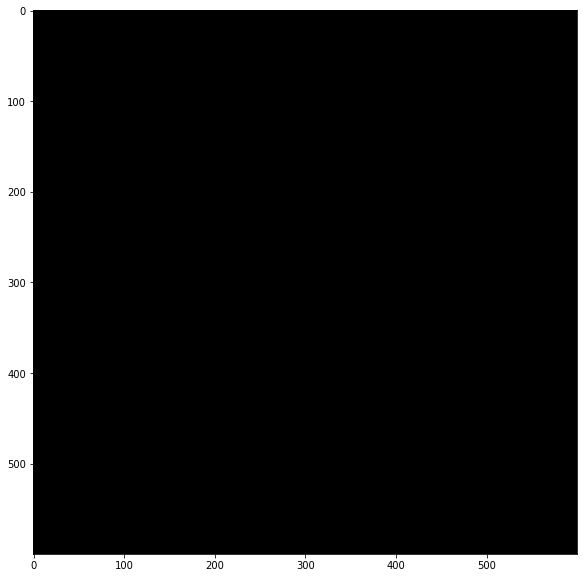

In [14]:
img = np.zeros((600, 600, 3))
plt.imshow(img);

2. Colorer en rouge et vert les rectangles représentés sur la figure de gauche ci-dessous.

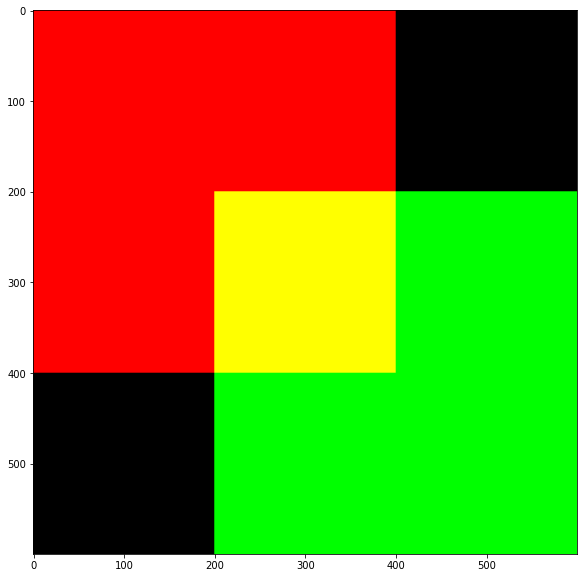

In [15]:
img[:400, :400, 0] = 1.0
img[200:, 200:, 1] = 1.0
plt.imshow(img);

3. En repartant d'une image complètement noire, colorer les disques représentés sur la figure de droite ci-dessous. *Indication : pour un centre de dique donné, on construira un tableau contenant, pour chaque pixel, la distance au centre de ce disque (on pourra s'aider de l'objet `ogrid` de `numpy`). On masquera par la suite les distances supérieures au rayon $R=150$, masques dont on se servira pour assigner les couleurs désirées.*

<center><img width="50%" src="https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/figures/rgb.png"/></center>

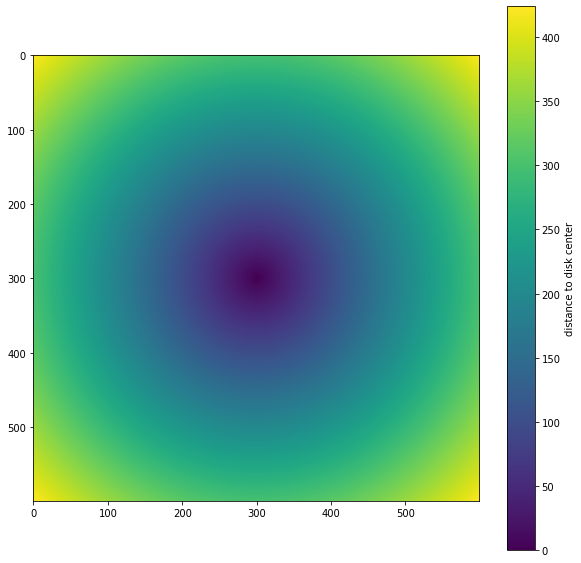

In [16]:
img = np.zeros((600, 600, 3))
iy, ix = np.ogrid[:600, :600]


def get_mask(center=(300, 300), radius=150):
    dist2center = np.sqrt((ix - center[0]) ** 2 + (iy - center[1]) ** 2)
    mask = dist2center < radius
    return dist2center, mask


dist2center, mask = get_mask()

plt.imshow(dist2center)
cbar = plt.colorbar()
cbar.set_label("distance to disk center")

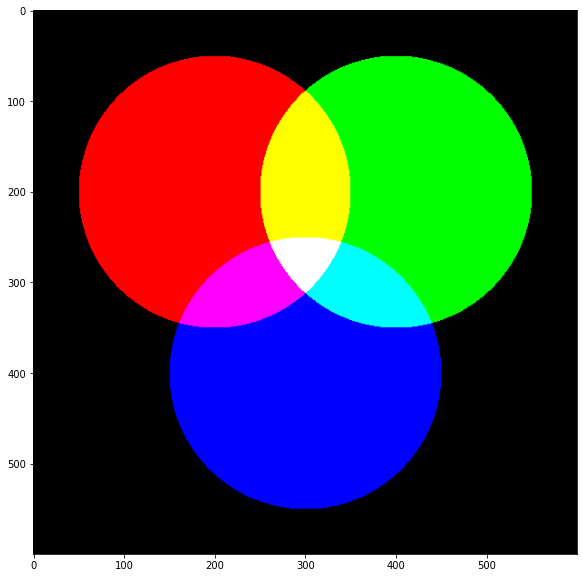

In [17]:
dist2center, mask = get_mask(center=(200, 200))
img[mask, 0] = 1
dist2center, mask = get_mask(center=(400, 200))
img[mask, 1] = 1
dist2center, mask = get_mask(center=(300, 400))
img[mask, 2] = 1

plt.imshow(img);

### *Prologue:* Transfert de couleurs

<div class="alert alert-block alert-info">
Un des projets informatiques en langage C++ (Magistère 1) traite du transfert de couleurs. Cette dernière partie est donc facultative et peut être sautée en première lecture.
</div>

La technique de "Transfert de couleurs" consiste à transférer les propriétés colorimétriques d'une image source à une image cible. Pour ce faire, on considère l'image [`source.png`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/source.png) à laquelle on souhaite appliquer les propriétés statistiques de couleurs de l'image [`cible.png`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/cible.png). Il s'agit, dans un premier temps, de transformer l'espace de couleur $(R, V, B)$ des deux images vers
l'espace colorimétrique $(\ell, \alpha, \beta)$. On applique ainsi les transformations suivantes

\begin{align*}
\begin{pmatrix}L\\M\\S\end{pmatrix}&=
\begin{pmatrix}
0.3811&0.5783&0.0402\\
0.1967&0.7244&0.0782\\
0.0241&0.1288&0.8444
\end{pmatrix}
\begin{pmatrix}R\\V\\B\end{pmatrix}\\
\begin{pmatrix}\ell\\\alpha\\\beta\end{pmatrix}&=
\begin{pmatrix}
1/\sqrt{3}&0&0\\
0&1/\sqrt{6}&0\\
0&0&1/\sqrt{2}
\end{pmatrix}
\begin{pmatrix}
1&1&1\\
1&1&-2\\
1&-1&0
\end{pmatrix}
\begin{pmatrix}\ln L\\\ln M\\\ln S\end{pmatrix}
\end{align*}

Une fois dans l'espace $(\ell, \alpha, \beta)$, il s'agit de transférer les propriétés statistiques, moyenne et écart-type, de chaque canal soit

\begin{align*}
\ell_t&=\frac{\sigma^\ell_c}{\sigma^\ell_s}\left(\ell_s-\langle\ell_s\rangle\right)+\langle\ell_c\rangle\\
\alpha_t&=\frac{\sigma^\alpha_c}{\sigma^\alpha_s}\left(\alpha_s-\langle\alpha_s\rangle\right)+\langle\alpha_c\rangle\\
\beta_t&=\frac{\sigma^\beta_c}{\sigma^\beta_s}\left(\beta_s-\langle\beta_s\rangle\right)+\langle\beta_c\rangle
\end{align*}

où les indices $t, s, c$ correspondent respectivement à l'image "transférée", source et cible.

Finalement, il convient de revenir à l'espace colorimétrique $(R, V, B)$ pour l'image "transférée" *via* les transformations inverses

\begin{align*}
   \begin{pmatrix}L\\M\\S\end{pmatrix}&=
     \begin{pmatrix}
       1&1&1\\
       1&1&-1\\
       1&-2&0
     \end{pmatrix}
     \begin{pmatrix}
     1/\sqrt{3}&0&0\\
     0&1/\sqrt{6}&0\\
     0&0&1/\sqrt{2}
     \end{pmatrix}
     \begin{pmatrix}\ell\\\alpha\\\beta\end{pmatrix}\\
   \begin{pmatrix}R\\V\\B\end{pmatrix}&=\begin{pmatrix}
     4.4679&-3.5873&0.1193\\
     -1.2186&2.3809&-0.1624\\
     0.0497&-0.2439&1.2045
     \end{pmatrix}\begin{pmatrix}\exp L\\\exp M\\\exp S\end{pmatrix}\\
\end{align*}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


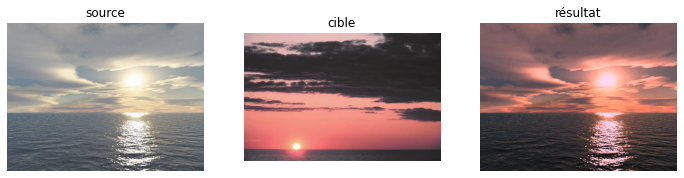

In [18]:
import matplotlib.pyplot as plt

M1 = np.array([[0.3811, 0.5783, 0.0402], [0.1967, 0.7244, 0.0782], [0.0241, 0.1288, 0.8444]])
M2 = np.array([[1 / np.sqrt(3), 0, 0], [0, 1 / np.sqrt(6), 0], [0, 0, 1 / np.sqrt(2)]])
M3 = np.array([[1, 1, 1], [1, 1, -2], [1, -1, 0]])

M4 = M3.T
M5 = M2
M6 = np.array([[4.4679, -3.5873, 0.1193], [-1.2186, 2.3809, -0.1624], [0.0497, -0.2439, 1.2045]])

img_source = plt.imread(
    "https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/source.png"
)
img_cible = plt.imread(
    "https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/cible.png"
)

img_source_LMS = np.dot(img_source, M1)
img_cible_LMS = np.dot(img_cible, M1)
img_source_lab = np.dot(np.log(img_source_LMS), np.dot(M2, M3))
img_cible_lab = np.dot(np.log(img_cible_LMS), np.dot(M2, M3))

mean_source_lab, std_source_lab = np.mean(img_source_lab, axis=(0, 1)), np.std(
    img_source_lab, axis=(0, 1)
)
mean_cible_lab, std_cible_lab = np.mean(img_cible_lab, axis=(0, 1)), np.std(
    img_cible_lab, axis=(0, 1)
)

img_transfer_lab = (
    std_cible_lab / std_source_lab * (img_source_lab - mean_source_lab) + mean_cible_lab
)

img_transfer_LMS = np.dot(img_transfer_lab, np.dot(M4, M5))
img_transfer = np.dot(np.exp(img_transfer_LMS), M6)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax in axes:
    ax.axis("off")
axes[0].imshow(img_source)
axes[0].set_title("source")
axes[1].imshow(img_cible)
axes[1].set_title("cible")
axes[2].imshow(img_transfer)
axes[2].set_title("résultat");